In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
from PIL import Image, ImageDraw, ImageFilter, ImageFont

In [2]:
df = pd.read_csv("FullData.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head(5)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


In [5]:
ind_list = [0,1,2,6,7,8,13,19,20,21,23,32]

df_2=df[["Name","Volleys","Penalties","Long_Shots","Freekick_Accuracy","Curve","Finishing","Speed","Dribbling","Strength"]]
DF=df_2.iloc[ind_list]
DF2=df[["Name","Volleys","Penalties","Long_Shots","Curve"]][8:12]

In [6]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [7]:
'''
from PIL import Image, ImageDraw, ImageFilter, ImageFont
img = Image.open('/content/drive/My Drive/ML/Data_Visualization/Soccer_Data/Adam Lallana.png').convert("RGBA")
background = Image.new("RGBA", img.size, (0,0,0,0))

mask = Image.new("RGBA", img.size, 0)
draw = ImageDraw.Draw(mask)
draw.ellipse((3,3,120,120), fill='black', outline=None)

new_img = Image.composite(img, background, mask)
new_img.show()
'''

'\nfrom PIL import Image, ImageDraw, ImageFilter, ImageFont\nimg = Image.open(\'/content/drive/My Drive/ML/Data_Visualization/Soccer_Data/Adam Lallana.png\').convert("RGBA")\nbackground = Image.new("RGBA", img.size, (0,0,0,0))\n\nmask = Image.new("RGBA", img.size, 0)\ndraw = ImageDraw.Draw(mask)\ndraw.ellipse((3,3,120,120), fill=\'black\', outline=None)\n\nnew_img = Image.composite(img, background, mask)\nnew_img.show()\n'

In [8]:
'''
# Libraries
import matplotlib.pyplot as plt
from math import pi
 
 
# ------- PART 1: Create background
 
# number of variable
df=df[["Name","Penalties", "Volleys","Curve"]]
df=df.head(2)
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(-12)
plt.yticks([10,20,50,80,100], ["10","20","50","80","100"], color="grey", size=7)
plt.ylim(0,100)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()
'''

'\n# Libraries\nimport matplotlib.pyplot as plt\nfrom math import pi\n \n \n# ------- PART 1: Create background\n \n# number of variable\ndf=df[["Name","Penalties", "Volleys","Curve"]]\ndf=df.head(2)\ncategories=list(df)[1:]\nN = len(categories)\n \n# What will be the angle of each axis in the plot? (we divide the plot / number of variable)\nangles = [n / float(N) * 2 * pi for n in range(N)]\nangles += angles[:1]\n \n# Initialise the spider plot\nax = plt.subplot(111, polar=True)\n \n# If you want the first axis to be on top:\nax.set_theta_offset(pi / 2)\nax.set_theta_direction(-1)\n \n# Draw one axe per variable + add labels\nplt.xticks(angles[:-1], categories)\n \n# Draw ylabels\nax.set_rlabel_position(-12)\nplt.yticks([10,20,50,80,100], ["10","20","50","80","100"], color="grey", size=7)\nplt.ylim(0,100)\n \n\n# ------- PART 2: Add plots\n \n# Plot each individual = each line of the data\n# I don\'t make a loop, because plotting more than 3 groups makes the chart unreadable\n \n# Ind

In [9]:
#pip install dash

In [10]:
#pip install jupyter_dash

In [11]:
'''
import dash
print("dash version:",dash.__version__)

import jupyter_dash
print("jupyter-dash version:",jupyter_dash.__version__)
'''

'\nimport dash\nprint("dash version:",dash.__version__)\n\nimport jupyter_dash\nprint("jupyter-dash version:",jupyter_dash.__version__)\n'

In [12]:
'''
## importing Dash, html, and dcc
from dash import Dash, html, dcc

## importing JupyterDash
from jupyter_dash import JupyterDash
'''

'\n## importing Dash, html, and dcc\nfrom dash import Dash, html, dcc\n\n## importing JupyterDash\nfrom jupyter_dash import JupyterDash\n'

In [13]:
#from dash import Input, Output
import plotly 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [14]:
DF_T=DF.T
DF_S = pd.DataFrame(DF_T.values[1:], columns = DF_T.iloc[0], index = DF_T.index.drop("Name"))


DF2_T=DF2.T
DF2_S = pd.DataFrame(DF2_T.values[1:], columns = DF2_T.iloc[0], index = DF2_T.index.drop("Name"))


In [15]:
'''
# create a figure with two place holder traces

r_initial = np.array(50)
theta_initial = 'Volleys'

fig = go.Figure(
    [
        go.Scatterpolar(r = DF_S.index, theta=['Volleys','Penalties','Long_Shots','Curve'],fill='toself', name="trace1")
        for i in range(2)
    ]
)


# but data for y and name in when country is selected
fig.update_layout(
    updatemenus=[
        {
            "x": b / 2 +0.29,
            "y": 0.8,
            "active": None,
            "buttons": [
                {
                    "label": c,
                    "method": "restyle",
                    "args": [{"r": [DF_S[c]], "name": c}, [b]],
                }
                for c in DF_S.columns
            ],
        }
        for b in range(2)
    ]
)

pyLogo = new_img

fig.add_layout_image(
    dict(
        source=new_img,
        xref="paper", yref="paper",
        x=0.31, y=0.86,
        sizex=0.31, sizey=0.435,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.add_layout_image(
    dict(
        source=new_img,
        xref="paper", yref="paper",
        x=0.81, y=0.86,
        sizex=0.31, sizey=0.435,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

img_field = Image.open('soccer-field-background-vector.jpg')

fig.add_layout_image(
    dict(
        source=img_field,
        xref="paper", yref="paper",
        x=1.16, y=-0.8,
        sizex=5, sizey=2.8,
        xanchor="right", yanchor="bottom", sizing= "contain",layer="below"
    )
)

for trace in fig.select_traces(selector=1):
    print("232")
    print(trace["name"])


fig.show()
'''

'\n# create a figure with two place holder traces\n\nr_initial = np.array(50)\ntheta_initial = \'Volleys\'\n\nfig = go.Figure(\n    [\n        go.Scatterpolar(r = DF_S.index, theta=[\'Volleys\',\'Penalties\',\'Long_Shots\',\'Curve\'],fill=\'toself\', name="trace1")\n        for i in range(2)\n    ]\n)\n\n\n# but data for y and name in when country is selected\nfig.update_layout(\n    updatemenus=[\n        {\n            "x": b / 2 +0.29,\n            "y": 0.8,\n            "active": None,\n            "buttons": [\n                {\n                    "label": c,\n                    "method": "restyle",\n                    "args": [{"r": [DF_S[c]], "name": c}, [b]],\n                }\n                for c in DF_S.columns\n            ],\n        }\n        for b in range(2)\n    ]\n)\n\npyLogo = new_img\n\nfig.add_layout_image(\n    dict(\n        source=new_img,\n        xref="paper", yref="paper",\n        x=0.31, y=0.86,\n        sizex=0.31, sizey=0.435,\n        xanchor="rig

In [16]:
repeat_row = DF_S.loc["Volleys"]
DF_S.loc["Repeat"] = repeat_row


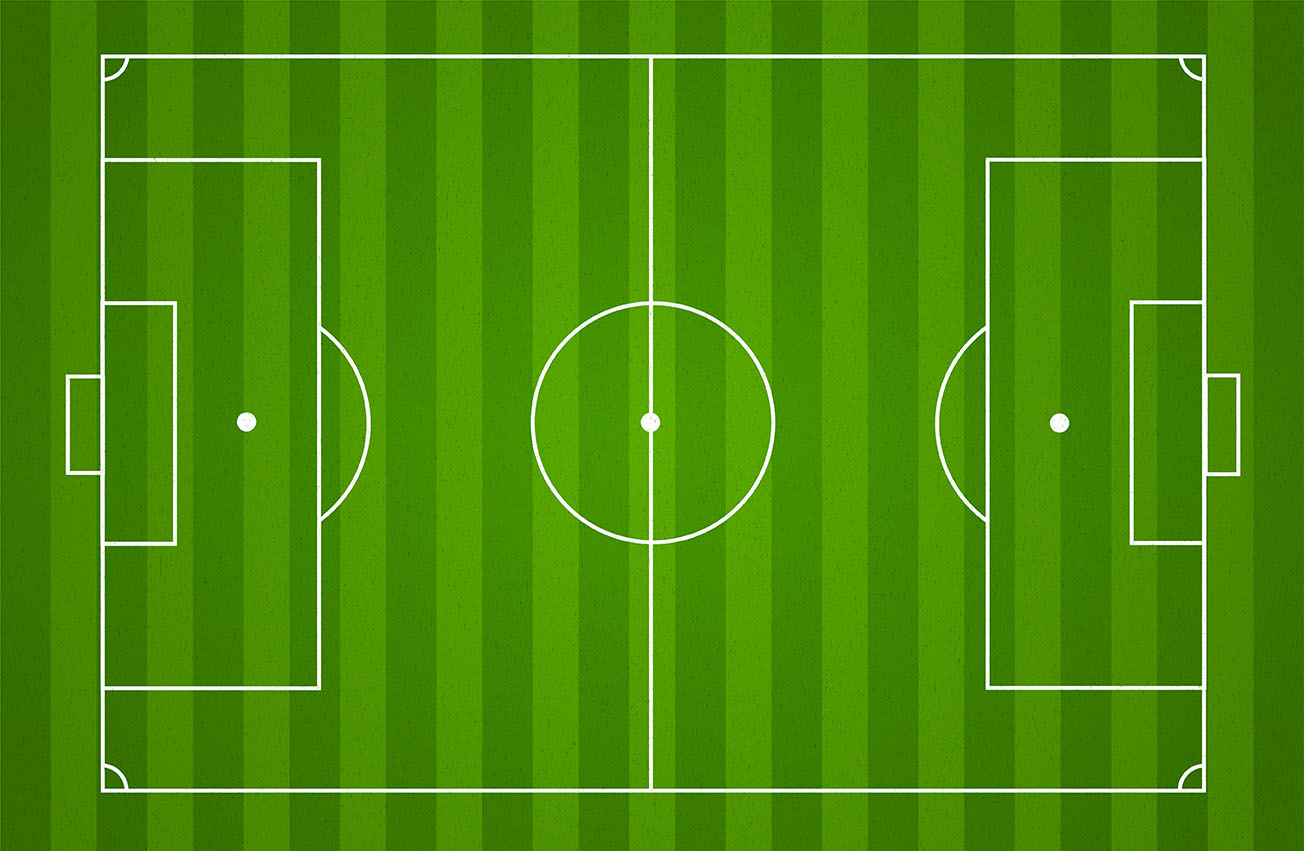
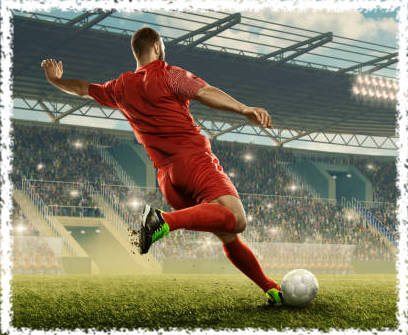
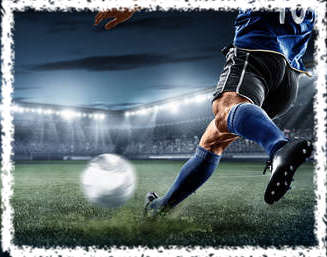

In [17]:
import plotly 
import base64

r_initial = [0]
theta_initial = 'Volleys'


fig = go.Figure(
    [
        go.Scatterpolar(r=DF_S[DF_S.columns[0]], theta=['Volleys','Penalties','Long Shots','Freekick Accuracy','Curve','Finishing','Speed','Dribbling','Strength','Volleys'],fill='toself')#,'Initial_min','Initial_max'],fill='toself', name="trace1")
        for i in range(2)
    ]
)

fig.update_traces(marker=dict(size=8))

# but data for y and name in when country is selected
fig.update_layout(
    title={
        'text': "SOCCER MANAGER",
        'y':0.98,
        'x':0.518,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 54, 'color':"white"}
        },

    updatemenus=[
        {
            "x": b / 1.17 +0.14,
            "y": 0.78,
            "active": None,
            "buttons": [
                {
                    "label": c,
                    "method": "restyle",
                    "args": [{"r": [DF_S[c]], "name": c}, [b]],
                }
                for c in DF_S.columns
            ],
        }
        for b in range(2)
    ]
   , showlegend= False
)


fig.update_layout(
        polar=dict(
            angularaxis=dict(
                tickfont=dict(size=22)
            )
        )
    )


fig.update_polars(angularaxis_color="white") 
fig.update_polars(radialaxis_gridcolor="black")
fig.update_polars(radialaxis_linecolor="#242") 
fig.update_polars(radialaxis_nticks=6) 
fig.update_polars(bgcolor="greenyellow") 


'''
pyLogo = new_img

fig.add_layout_image(
    dict(
        source=new_img,
        xref="paper", yref="paper",
        x=0.1, y=0.88,
        sizex=0.31, sizey=0.435,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.add_layout_image(
    dict(
        source=new_img,
        xref="paper", yref="paper",
        x=0.98, y=0.88,
        sizex=0.31, sizey=0.435,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)
'''

img_field = Image.open('soccer-field-background-vector.jpg')

fig.add_layout_image(
    dict(
        source=img_field,
        xref="paper", yref="paper",
        x=1.18845, y=-0.39,
        sizex=2.85, sizey=1.82,
        xanchor="right", yanchor="bottom", sizing= "contain",layer="below"
    )
)


img_red = Image.open('istockphoto-1163749879-612x612.jpg')

fig.add_layout_image(
    dict(
        source=img_red,
        xref="paper", yref="paper",
        x=1.02, y=0.8,
        sizex=0.251, sizey=0.335,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)


img_blue = Image.open('191614004-football-soccer-player-kicking-in-action-in-blue-team-euro-cup-nations-cup-france-brazil-italy.jpg')

fig.add_layout_image(
    dict(
        source=img_blue,
        xref="paper", yref="paper",
        x=0.195, y=0.8,
        sizex=0.251, sizey=0.335,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

#pio.write_html(fig, file='test.html', auto_open=True)

fig.show()

In [18]:
#%%shell
#jupyter nbconvert --to html /content/Visualization_F_Project-2.ipynb

In [19]:
import plotly.io as pio
pio.write_html(fig, file='Name1.html', auto_open=True)

In [20]:
from google.colab import files
files.download('Name1.html') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
#with open('soccer-field-background-vector.jpg', 'rb') as f:
#  img_field = f.read()
#img_field64 = base64.b64encode(img_field).decode('utf-8')



'''
fig.add_layout_image(
    source=img_field64,
    xref='paper',
    yref='paper',
    x=0.6,
    y=0.7,
    sizex=2,
    sizey=2,
    layer='below'

)
'''

"\nfig.add_layout_image(\n    source=img_field64,\n    xref='paper',\n    yref='paper',\n    x=0.6,\n    y=0.7,\n    sizex=2,\n    sizey=2,\n    layer='below'\n\n)\n"